# < 타이타닉호 생존자 예측 >  

## 목차

#1. 데이터 준비 및 탐색 / Preparing dataset 


#2. 데이터 전처리 방법 & 이유 / Feature engineering & Feature selection 
#1) 유의미한 feature 선택하기 : Pclass, Sex, Age, SibSp&Parch, Embarked (5개 선택)
#2) 불필요한 칼럼 삭제


#3. 모델 적용 프로세스 및 결과 / 3개의 기본 모델 선택 (SVC, KNN, 의사결정나무)
#1) KNN 모델 
#2) SVC 모델 
#3) 의사결정나무
#4) XGBOOST
#5) Random Forest

#4. 모델 간 성능비교 / Predict on test data & Check the result with metrics
#1) KNN 모델, SVC모델, 의사결정나무, XGBOOST, Random Forest ( y_train / y_test : )


In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?


## 1. 데이터 준비 및 탐색 / Preparing dataset 

In [7]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [9]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [10]:
# del data_df['Survived']
x_data = data_df.copy()
x_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2. 데이터 전처리 방법 & 이유 / Feature engineering & Feature selection 

### Pclass, Sex, Age, SibSp&Parch, Embarked (5개 선택)

# < 변수 살펴보기 >

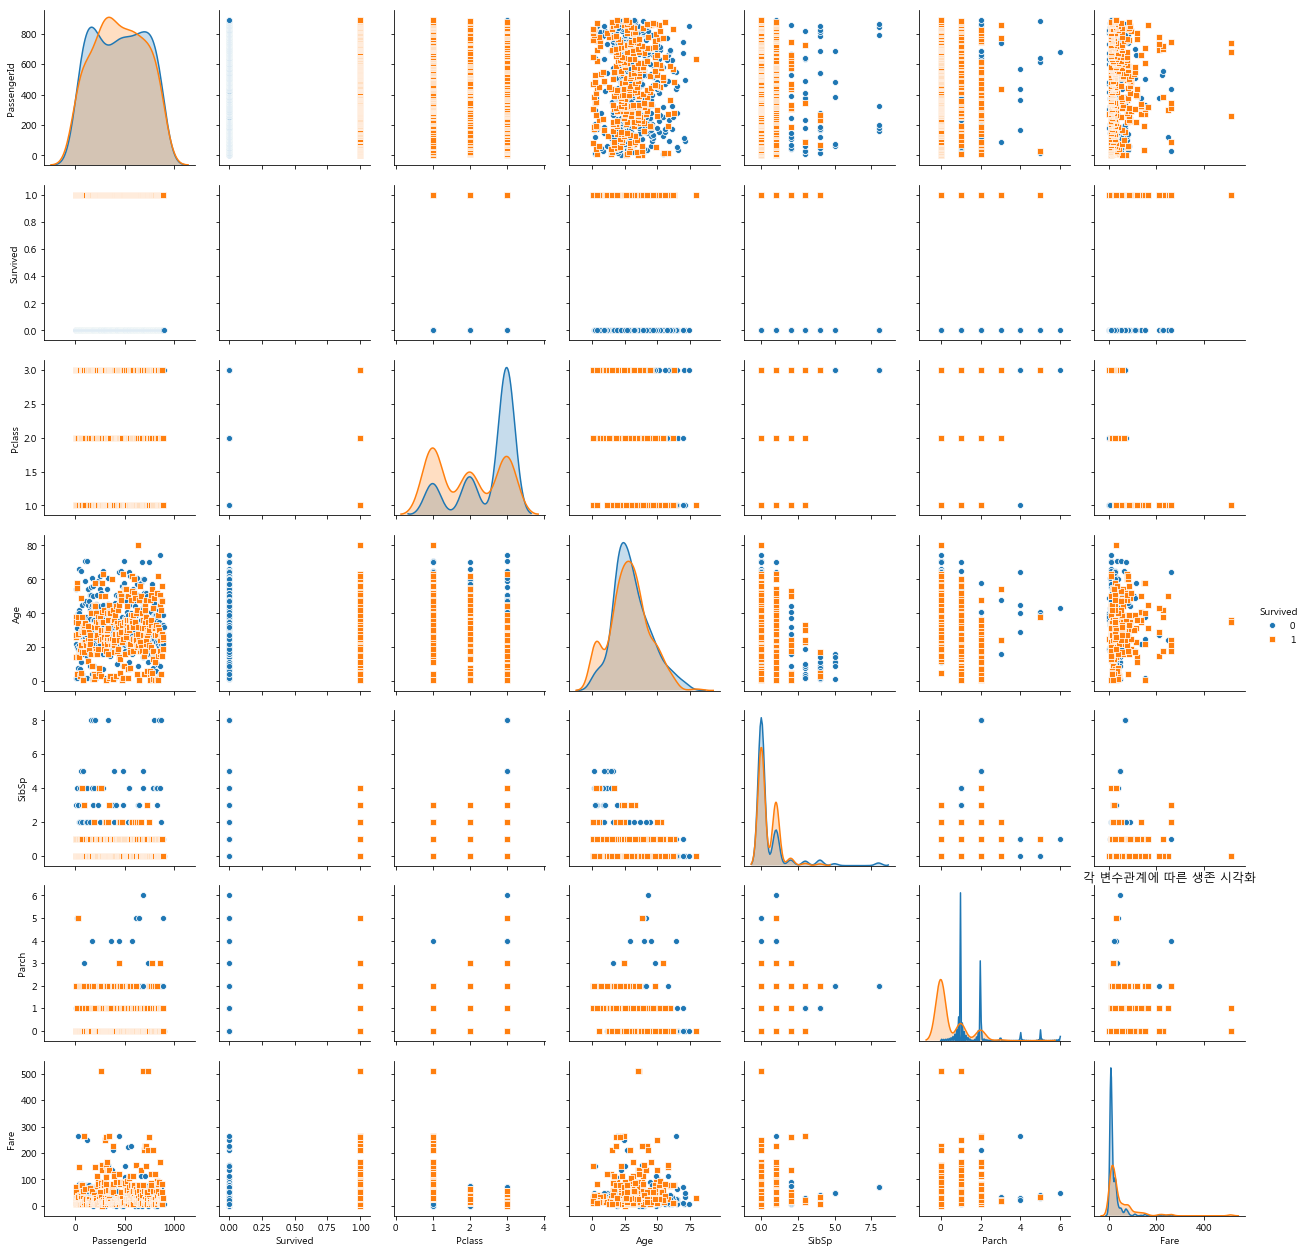

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc 
%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


sns.pairplot(data_df, hue="Survived", markers=["o", "s"])
plt.title("각 변수관계에 따른 생존 시각화")
plt.show()

## < 크로스탭을 활용한 컬럼 분석 >
#### 두 컬럼에 교차 빈도, 비율, 덧셈 등을 구할 때 사용

### Pclass 

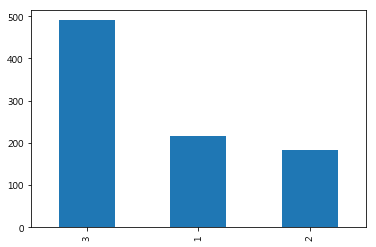

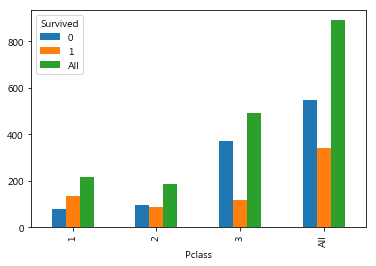

In [13]:
data_df['Pclass'].value_counts().plot(kind = "bar")
ct_pclass = pd.crosstab( data_df.Pclass, data_df.Survived, margins=True)
ct_pclass.plot.bar()


### Embarked  : Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 / 결측치는 빈도가 가장 높은 것

In [14]:
# 'S':0, 'C':1, 'Q':2
# C = Cherbourg-프랑스, Q = Queenstown-뉴질랜드, S = Southampton-영국

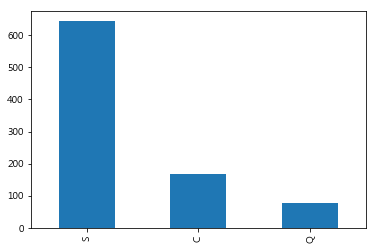

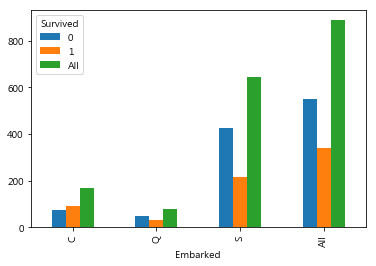

In [15]:
# 어떻게, 얼만큼 분포되어 있는지 -> value_counts 로 개수 파악 & 그래프 그리기
data_df['Embarked'].value_counts().plot(kind = "bar")
ct_embarked = pd.crosstab(data_df.Embarked, data_df.Survived, margins=True)
ct_embarked.plot.bar()

In [16]:
# 결측치 채우기
x_data['Embarked'] = x_data['Embarked'].fillna("S") ## 결측치가 3개라 유의미한 의미 미미
# 데이터 숫자로 바꾸기
x_data['Embarked'] = x_data['Embarked'].replace({'S':0, 'C':1, 'Q':2})

### Sex : Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 / male은 0, female은 1

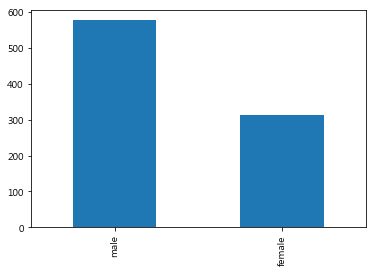

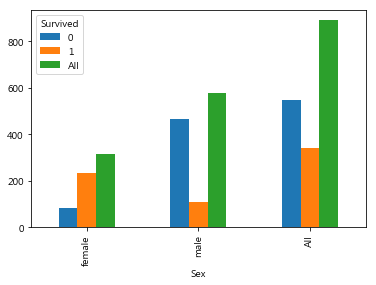

In [17]:
data_df['Sex'].value_counts().plot(kind = "bar")
ct_embarked = pd.crosstab(data_df.Sex, data_df.Survived, margins=True)
ct_embarked.plot.bar()

In [18]:
# Sex 숫자로 변환. male은 0, female은 1
x_data['Sex'] = x_data['Sex'].replace({'male':0, 'female':1})

### SibSp&Parch : SibSp 과 Parch 합해서 새로운 열 만들기

In [19]:
#동승자 수 합치기, 케어하는 사람수는 똑같기 때문
x_data["Passenger"] = x_data["Parch"] + x_data["SibSp"]
x_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1


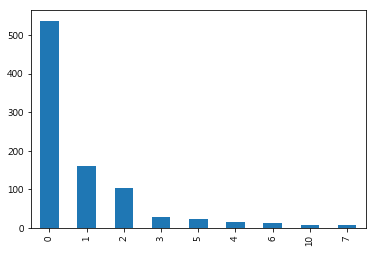

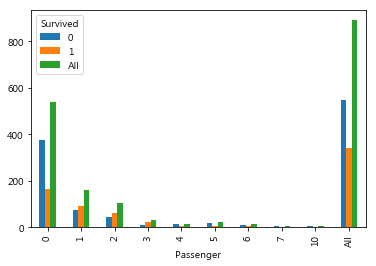

In [20]:
x_data['Passenger'].value_counts().plot(kind = "bar")
ct_passenger = pd.crosstab(x_data.Passenger, data_df.Survived, margins=True)
ct_passenger.plot.bar()

In [21]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Passenger      891 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


### Age : 결측치는 사망자가 가장많은 20대의 평균치로 추가 / 연령대 분류 및 칼럼 추가 / 수치화 및 시각화

In [22]:
# 연령대 결측치 채우기
x_data['Age'] = x_data['Age'].fillna(28) 
x_data['Age'].head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [23]:
# 연령대  분류하고 칼럼 추가해서 표시하기
age1 = pd.cut(x_data['Age'], bins=[0,9,19,29,39,49,59,69,79,89],labels = ['0이상~10미만','10이상~20미만','20이상~30미만','30이상~40미만','40이상~50미만'
                                                                     ,'50이상~60미만','60이상~70미만','70이상~80미만','80이상~90미만'])
                              # [미포함,포함]                                
age1 # 연령대분류

0      20이상~30미만
1      30이상~40미만
2      20이상~30미만
3      30이상~40미만
4      30이상~40미만
5      20이상~30미만
6      50이상~60미만
7       0이상~10미만
8      20이상~30미만
9      10이상~20미만
10      0이상~10미만
11     50이상~60미만
12     20이상~30미만
13     30이상~40미만
14     10이상~20미만
15     50이상~60미만
16      0이상~10미만
17     20이상~30미만
18     30이상~40미만
19     20이상~30미만
20     30이상~40미만
21     30이상~40미만
22     10이상~20미만
23     20이상~30미만
24      0이상~10미만
25     30이상~40미만
26     20이상~30미만
27     10이상~20미만
28     20이상~30미만
29     20이상~30미만
         ...    
861    20이상~30미만
862    40이상~50미만
863    20이상~30미만
864    20이상~30미만
865    40이상~50미만
866    20이상~30미만
867    30이상~40미만
868    20이상~30미만
869     0이상~10미만
870    20이상~30미만
871    40이상~50미만
872    30이상~40미만
873    40이상~50미만
874    20이상~30미만
875    10이상~20미만
876    20이상~30미만
877    10이상~20미만
878    20이상~30미만
879    50이상~60미만
880    20이상~30미만
881    30이상~40미만
882    20이상~30미만
883    20이상~30미만
884    20이상~30미만
885    30이상~40미만
886    20이상~30미만
887    10이상~20미만
888    20이상~30

In [24]:
# 연령대 칼럼 추가하기
x_data['연령대'] = age1
x_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,연령대
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,0,1,20이상~30미만


In [25]:
# 연령대 수치화하기
age2 = pd.cut(x_data['Age'], bins=[0,9,19,29,39,49,59,69,79,89],labels = ['0','1','2','3','4','5','6','7','8'])
age2
x_data['Agegroup'] = age2
x_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,연령대,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,0,1,20이상~30미만,2


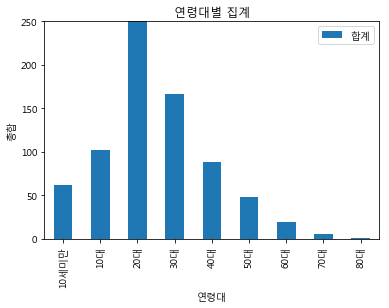

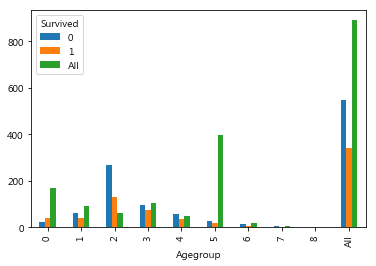

In [26]:
# 연령대 별 분포 시각화
age3 = x_data.groupby(['연령대'])['Name'].count() # 891중 714 # 177은 결측치(Nan)
age3 = age3.reset_index()
age3 = age3.rename(columns = {'Name' : '합계'})
age3
from matplotlib import font_manager, rc 
%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

age3.plot(kind='bar')

plt.title("연령대별 집계")
plt.xlabel("연령대")
plt.ylabel("총합")
plt.xticks([0,1,2,3,4,5,6,7,8],['10세미만','10대','20대','30대','40대','50대','60대','70대','80대']) # x축 단위 바꾸기
plt.ylim(0, 250) # y축 범위 설정
plt.show()

#crosstab
ct_age = pd.crosstab(x_data.Agegroup, data_df.Survived, margins=True)
ct_age.plot.bar()

### Fare 


In [27]:
x_data['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [28]:
# qcut 을 이용해서 범주형 값으로 바꾸기
x_data['Fare_qcut'] = pd.qcut(x_data.Fare, q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] )

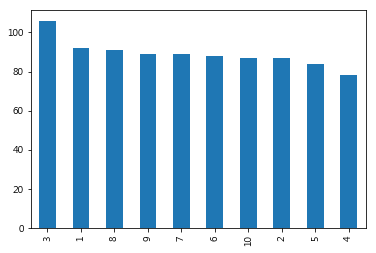

In [29]:
x_data['Fare_qcut'].value_counts().plot(kind = "bar")

### Cabin

In [30]:
# Cabin 앞글자만 추리기
x_data['Cabin_loc'] = x_data['Cabin'].str[:1]
x_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,연령대,Agegroup,Fare_qcut,Cabin_loc
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,20이상~30미만,2,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,30이상~40미만,3,9,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,20이상~30미만,2,3,NaN


In [31]:
# 결측치 N으로 채우기
x_data['Cabin_loc'] = x_data['Cabin_loc'].fillna('N')
x_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,연령대,Agegroup,Fare_qcut,Cabin_loc
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,0,1,20이상~30미만,2,1,N


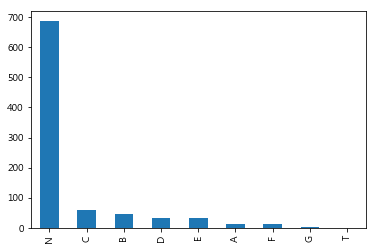

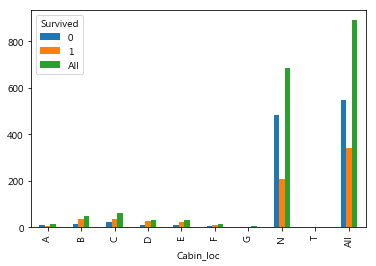

In [32]:
x_data['Cabin_loc'].value_counts().plot(kind = "bar")
ct_cabin = pd.crosstab(x_data.Cabin_loc, data_df.Survived, margins=True)
ct_cabin.plot.bar()

### 2) 불필요한 칼럼 삭제

In [33]:

# 필요한 칼럼만 추려서 새로운 df 만들기
x_data = x_data[['Pclass', 'Sex', 'Embarked', 'Passenger','Agegroup'  ]]
x_data.head(2)

,Pclass,Sex,Embarked,Passenger,Agegroup
0,3,0,0,1,2
1,1,1,1,1,3


In [34]:
# # 피클로 백업
# import pickle
# with open("x_data.pickle","wb") as fw:
#     pickle.dump(x_data, fw)

In [35]:
# with open("y_data.pickle","wb") as fw:
#     pickle.dump(y_data, fw)

## 3. 모델 적용 프로세스 및 결과 / 3개의 기본 모델 선택 (SVC, KNN, 의사결정나무)
## Train - Test split (비율을 7:3, seed는 0 )
## Create model instance variable 
## Train the model


In [36]:
# 전체적으로 확률 상향평준화

In [37]:
#모델 적용 프로세스 및 이슈 사항

# - 풀어내려는 문제의 종류와 데이터의 타입(형태,수)에 따른 ML 알고리즘 선택 
# - 50개 이상의 데이터베이스, Category, labeled data
# - 최종적으로 Classification에서 SVC, KNN, Kernel 선택
# - SVC와 Kernel은 중복되는 것이 있어서 Kernel 대신에 의사결정나무로 선택
# - 최종 3개의 모델 : SVC, KNN, 의사결정나무

In [38]:
# 어레이로 바꿔주기
test = np.array(x_data)
target = np.array(pd.DataFrame(y_data, columns=['Survived']))
# feature 선택. 슬라이스로 가능. 
#우선 전채 넣어 보기

X = test
Y = target

In [39]:
# tr이랑 test set 나누기
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)

## 1)KNN 모델 ( y_train : 0.838 / y_test : 0.817 )

In [40]:
# 필요한 library import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
# 빈 객체 만들기
from sklearn import neighbors, datasets
knn = neighbors.KNeighborsClassifier(9) # K-Neighbors & 클러스터 분류 (Classifier)
# 모델학습시키기
knn.fit(x_train, y_train)

C:\Users\6\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [42]:
print("Accuracy on Training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on Training set: 0.838
Accuracy on Test set: 0.817


C:\Users\6\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\6\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\6\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\6\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\U

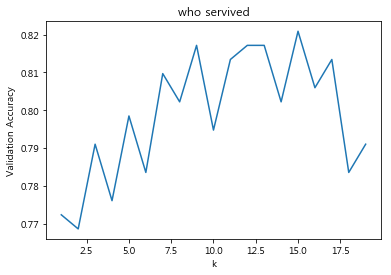

In [43]:
# K값을 바꿔서 비교하기


import matplotlib.pyplot as plt
k_list = range(1,20)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    accuracies.append(classifier.score(x_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()

In [44]:
knn = neighbors.KNeighborsClassifier(15) 
knn.fit(x_train, y_train)
print('{:.3f}'.format(knn.score(x_train, y_train)))
print('{:.3f}'.format(knn.score(x_test, y_test)))

0.828
0.821


C:\Users\6\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## 2)SVC모델 ( y_train : 0.852 / y_test : 0.832)

In [45]:
from sklearn.svm import SVC

svc = SVC(C=15.0)
svc.fit(x_train, y_train)

# Accuracy Test
print("Accuracy on Training set: {:.3f}".format(svc.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(x_test, y_test)))

Accuracy on Training set: 0.854
Accuracy on Test set: 0.825


C:\Users\6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

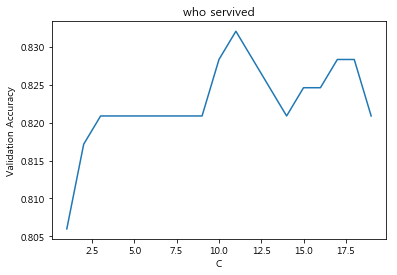

In [46]:
# C값 바꿔서 비교하기

c_list = range(1,20)
accuracies = []
for c in c_list:
    svc = SVC(C = c)
    svc.fit(x_train, y_train)
    accuracies.append(svc.score(x_test, y_test))
plt.plot(c_list, accuracies)
plt.xlabel("C")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()

In [47]:
svc = SVC(C=11.0)
svc.fit(x_train, y_train)

# Accuracy Test
print("Accuracy on Training set: {:.3f}".format(svc.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(x_test, y_test)))

Accuracy on Training set: 0.852
Accuracy on Test set: 0.832


C:\Users\6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3)의사결정나무 ( y_train : 0.875 / y_test : 0.799)

In [48]:
import seaborn as sns
import scipy as sp
from scipy import stats # statistics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [49]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train, y_train)
dt_prediction = dt_clf.predict(x_test)

print("Accuracy on Training set: {:.3f}".format(dt_clf.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(dt_clf.score(x_test, y_test)))

Accuracy on Training set: 0.875
Accuracy on Test set: 0.799


In [50]:
# 트리 시각화
!pip install pydotplus
import pydotplus 

In [51]:
feature_names = x_data.columns.tolist()
feature_names = feature_names[0:5]
target_name = (['Death', 'Survived'])

from sklearn import tree
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)


dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

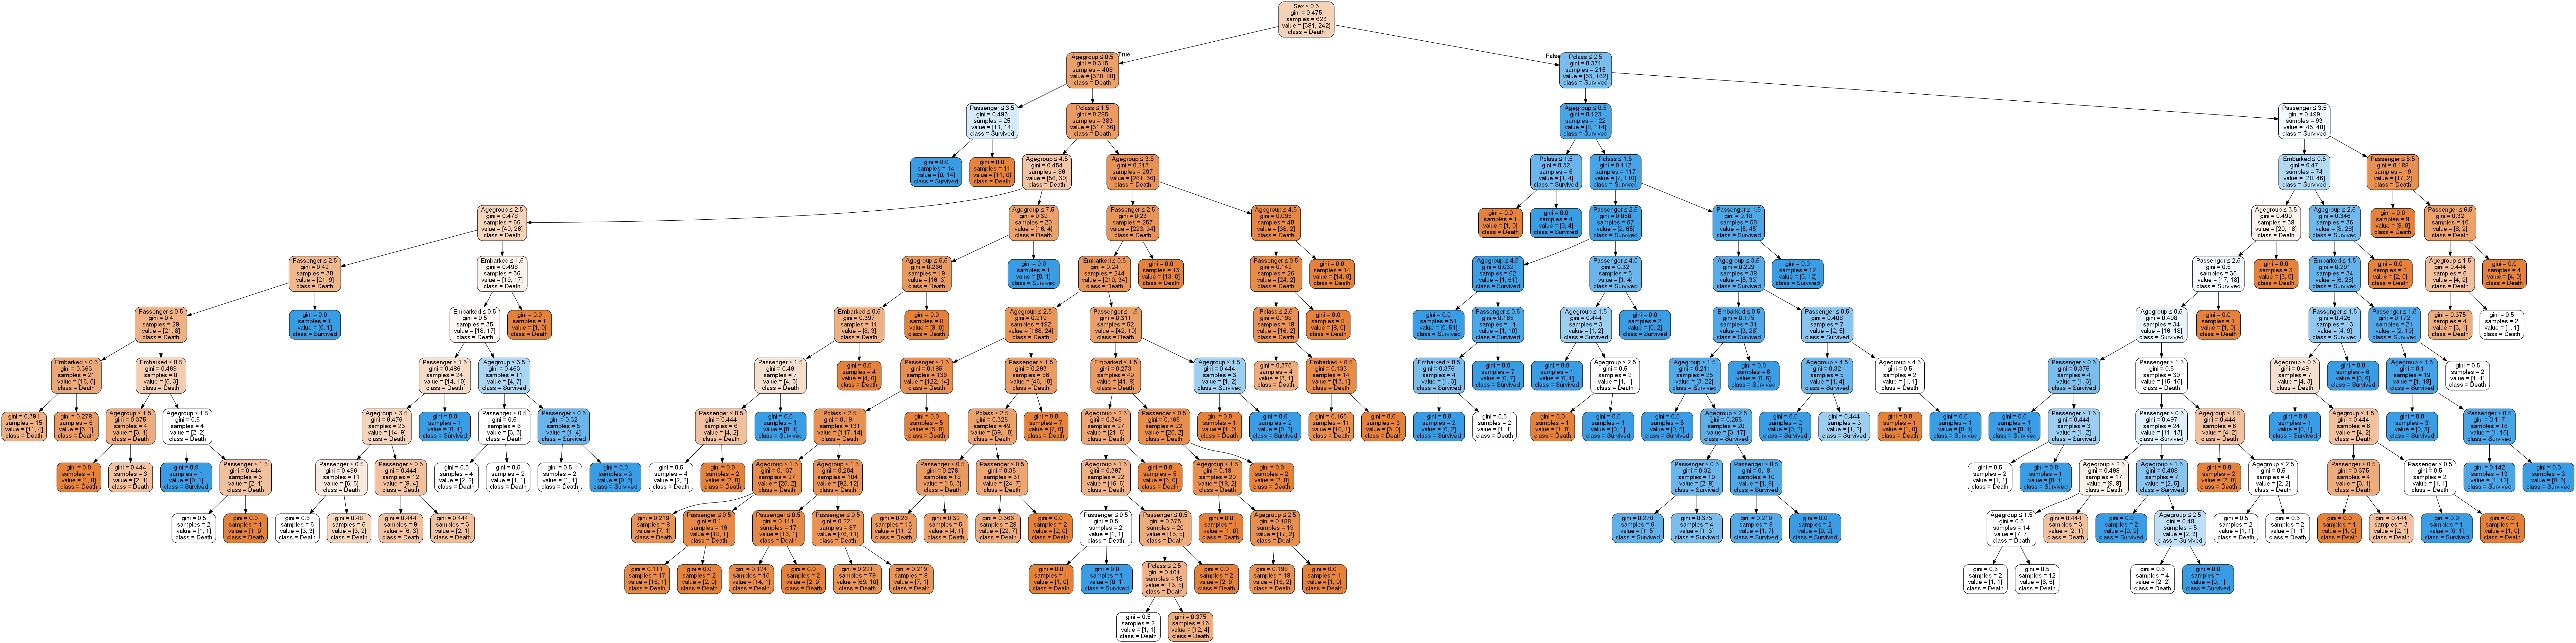

In [52]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from IPython.display import Image
Image(dt_graph.create_png())

## 4)XGBOOST ( y_train : 0.865 / y_test : 0.806 )

In [53]:
from IPython.display import Image

![title](install.png)

 xgboost를 사용하기 위해선 따로 설치를 해줘야한다 <br/>
 아나콘다 실행후, conda install -c anaconda py-xgboost 입력후. y

In [54]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier, XGBModel
from xgboost import plot_importance, plot_tree
from sklearn import model_selection

In [55]:
xgb = XGBClassifier(n_estimators= 500, learning_rate=0.1, max_depth= 4)
xgb = xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print("Accuracy on Training set: {:.3f}".format(xgb.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(xgb.score(x_test, y_test)))

Accuracy on Training set: 0.865
Accuracy on Test set: 0.806


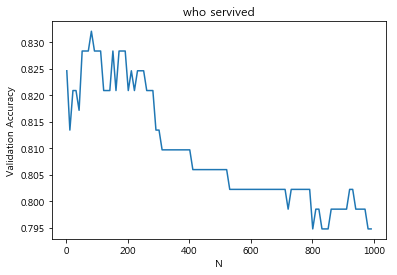

In [56]:
# N 값 바꿔 비교

n_list = range(1,1000, 10)
accuracies = []
for k in n_list:
    xgb = XGBClassifier(n_estimators= k, learning_rate=0.1, max_depth= 4)
    xgb = xgb.fit(x_train, y_train)
    accuracies.append(xgb.score(x_test, y_test))
plt.plot(n_list, accuracies)
plt.xlabel("N")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()

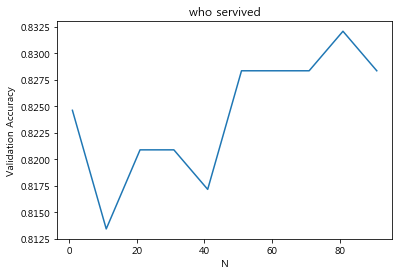

In [57]:
# 범위 좁혀서 비교

n_list = range(1,100, 10)
accuracies = []
for k in n_list:
    xgb = XGBClassifier(n_estimators= k, learning_rate=0.1, max_depth= 4)
    xgb = xgb.fit(x_train, y_train)
    accuracies.append(xgb.score(x_test, y_test))
plt.plot(n_list, accuracies)
plt.xlabel("N")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()

In [58]:
xgb = XGBClassifier(n_estimators= 80, learning_rate=0.1, max_depth= 4)
xgb = xgb.fit(x_train, y_train)
print('{:.3f}'.format(knn.score(x_train, y_train)))
print('{:.3f}'.format(knn.score(x_test, y_test)))

0.828
0.821


## 5) Random Forest ( y_train : 0.875 / y_test : 0.806 )

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [60]:
forest = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
print("Accuracy on Training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on Training set: 0.867
Accuracy on Test set: 0.806


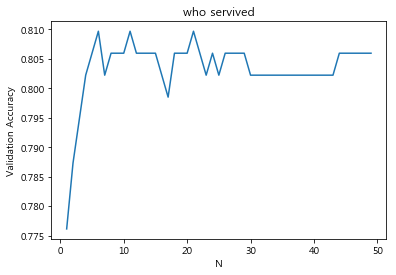

In [62]:
n_list = range(1,50)
accuracies = []
for k in n_list:
    forest = RandomForestClassifier(n_estimators=k, n_jobs=-1, random_state=42)
    forest.fit(x_train, y_train)
    accuracies.append(forest.score(x_test, y_test))
plt.plot(n_list, accuracies)
plt.xlabel("N")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()

In [63]:
forest = RandomForestClassifier(n_estimators=22, n_jobs=-1, random_state=42)
forest.fit(x_train, y_train)
print("Accuracy on Training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on Training set: 0.875
Accuracy on Test set: 0.806


## 4. 모델 간 성능비교 / Predict on test data & Check the result with metrics

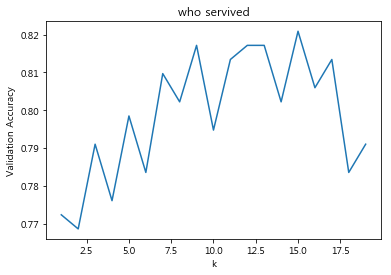

Accuracy on Training set: 0.828
Accuracy on Test set: 0.821


In [64]:
# KNN 모델
import matplotlib.pyplot as plt
k_list = range(1,20)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    accuracies.append(classifier.score(x_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()
knn = neighbors.KNeighborsClassifier(15) 
knn.fit(x_train, y_train)
print("Accuracy on Training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(knn.score(x_test, y_test)))

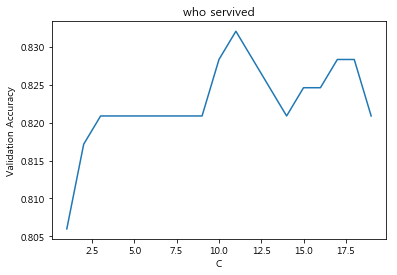

Accuracy on Training set: 0.852
Accuracy on Test set: 0.832


In [65]:
#SVC 모델
c_list = range(1,20)
accuracies = []
for c in c_list:
    svc = SVC(C = c)
    svc.fit(x_train, y_train)
    accuracies.append(svc.score(x_test, y_test))
plt.plot(c_list, accuracies)
plt.xlabel("C")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()
svc = SVC(C=11.0)
svc.fit(x_train, y_train)
print("Accuracy on Training set: {:.3f}".format(svc.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(x_test, y_test)))

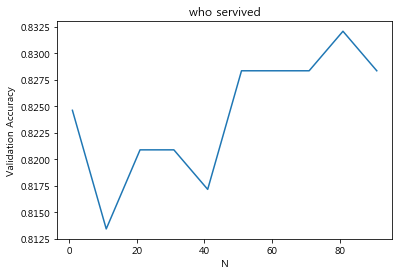

Accuracy on Training set: 0.828
Accuracy on Test set: 0.821


In [66]:
# xgboost
n_list = range(1,100, 10)
accuracies = []
for k in n_list:
    xgb = XGBClassifier(n_estimators= k, learning_rate=0.1, max_depth= 4)
    xgb = xgb.fit(x_train, y_train)
    accuracies.append(xgb.score(x_test, y_test))
plt.plot(n_list, accuracies)
plt.xlabel("N")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()
xgb = XGBClassifier(n_estimators= 80, learning_rate=0.1, max_depth= 4)
xgb = xgb.fit(x_train, y_train)
print("Accuracy on Training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(knn.score(x_test, y_test)))

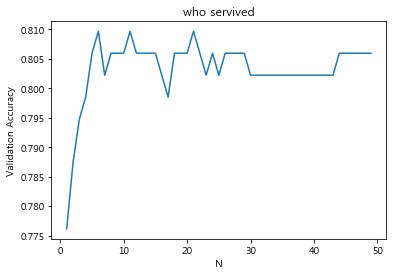

Accuracy on Training set: 0.875
Accuracy on Test set: 0.806


In [67]:
# Random Forest
n_list = range(1,50)
accuracies = []
for k in n_list:
    forest = RandomForestClassifier(n_estimators=k, n_jobs=-1, random_state=42)
    forest.fit(x_train, y_train)
    accuracies.append(forest.score(x_test, y_test))
plt.plot(n_list, accuracies)
plt.xlabel("N")
plt.ylabel("Validation Accuracy")
plt.title("who servived")
plt.show()
forest = RandomForestClassifier(n_estimators=22, n_jobs=-1, random_state=42)
forest.fit(x_train, y_train)
print("Accuracy on Training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(forest.score(x_test, y_test)))

### 결과
#### 1)KNN 모델 ( y_train : 0.838 / y_test : 0.817 )
## 2)SVC모델 ( y_train : 0.852 / y_test : 0.832)
#### 3)의사결정나무 ( y_train : 0.875 / y_test : 0.799)
#### 4)XGBOOST ( y_train : 0.865 / y_test : 0.806 )
#### 5) Random Forest ( y_train : 0.875 / y_test : 0.806 )